In [17]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

title_list = pd.DataFrame(pd.read_csv('/Users/vincentzhang/Documents/Recommender/hk_titlelist.csv',encoding='utf-8'))
title_cat_mapping = pd.DataFrame(pd.read_csv('/Users/vincentzhang/Documents/Recommender/hk_title_cat_mapping.csv',encoding='utf-8'))
title_vv = pd.DataFrame(pd.read_csv('/Users/vincentzhang/Documents/Recommender/hk_title_vv.csv',encoding='utf-8'))
user_title = pd.DataFrame(pd.read_csv('/Users/vincentzhang/Documents/Recommender/hk_user_title.csv',encoding='utf-8'))

In [10]:
title_list.head()

,area_name,group_series_name
0,Hong Kong,Fullmetal Alchemist Brotherhood
1,Hong Kong,BOF Trailer
2,Hong Kong,Garo The Animation 2
3,Hong Kong,Weightlifting Fairy Kim Bok Joo
4,Hong Kong,Shadow of Justice (Mandarin version)


In [16]:
title_list.shape

(1165, 2)

In [15]:
title_cat_mapping.head()

,area_name,category_name,group_series_name
0,Hong Kong,Chinese Dramas,My True Friend
1,Hong Kong,Chinese Dramas,Palace
2,Hong Kong,Chinese Dramas,Police Tactical Unit (Cantonese)
3,Hong Kong,Chinese Dramas,Swordsman
4,Hong Kong,Japanese Dramas,Cecile’s Plot


In [17]:
title_cat_mapping.shape

(1409, 3)

In [12]:
title_vv.head()

,area_name,group_series_name,sum
0,Hong Kong,100 Days My Prince,86358
1,Hong Kong,100 Days My Prince SP,1721
2,Hong Kong,12 Years Promise,6277
3,Hong Kong,20-30 Dictionary,26258
4,Hong Kong,2018 MBC Idol Star Athletics Championships,1770


In [18]:
title_vv.shape

(971, 3)

In [13]:
user_title.head()

,user_sk,group_series_name,area_name
0,1,Quiz from God - Reboot,Hong Kong
1,1,The Time of Peanut,Hong Kong
2,6,Ace of Diamond actII,Hong Kong
3,6,Chess Tamashi,Hong Kong
4,6,Infinite Challenge (2018),Hong Kong


In [19]:
user_title.shape

(2893601, 3)

In [24]:
title_vv['sum'].median()

1623.0

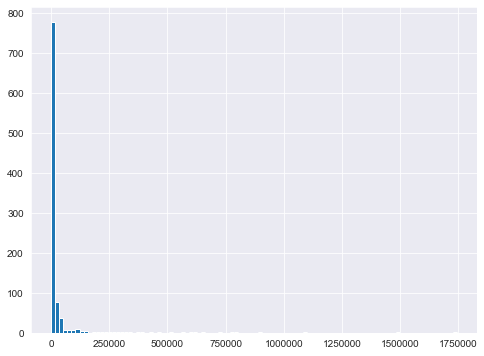

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
title_vv['sum'].hist(bins=100)

In [4]:
title_vv_top20 = pd.DataFrame(title_vv.nlargest(20,'sum'))
title_vv_top20

,area_name,group_series_name,sum
378,Hong Kong,Police Tactical Unit (Cantonese),1744214
122,Hong Kong,Encounter (HK),1483177
231,Hong Kong,K1_Daily News,1090420
220,Hong Kong,Item,891762
463,Hong Kong,Slam Dunk (Cantonese),800251
114,Hong Kong,Doctor Prisoner,789991
23,Hong Kong,Angel's Last Mission-Love,780989
459,Hong Kong,Sky Castle,729601
373,Hong Kong,Partners for Justice 2,722666
69,Hong Kong,Clean with Passion for Now (HK),662201


In [28]:
user_title.groupby('user_sk').count()

,group_series_name,area_name
user_sk,,
1,2,2
6,5,5
7,4,4
10,12,12
14,8,8
15,14,14
16,7,7
17,3,3
18,21,21


In [18]:
user_title.insert(3,'watched',1,allow_duplicates=True)
user_title.head()

,user_sk,group_series_name,area_name,watched
0,1,Quiz from God - Reboot,Hong Kong,1
1,1,The Time of Peanut,Hong Kong,1
2,6,Ace of Diamond actII,Hong Kong,1
3,6,Chess Tamashi,Hong Kong,1
4,6,Infinite Challenge (2018),Hong Kong,1


In [20]:
basket = (user_title[user_title['area_name'] =="Hong Kong"]
          .groupby(['user_sk', 'group_series_name'])['watched']
          .sum().unstack().reset_index().fillna(0)
          .set_index('user_sk'))
basket.head()

group_series_name,100 Days My Prince,100 Days My Prince SP,12 Years Promise,20-30 Dictionary,2018 MBC Idol Star Athletics Championships,24小時拯救餐廳大作戰,40's Spring (2017),A Certain Scientific Accelerator,A Place Further Than The Universe,A Poem A Day,...,You don't know Gunma yet,Your House Helper,Yuuna and the Haunted Hot Springs,euromaxx,kiss me,lovey dovey,missing korea,the secret message,top star: yoo-baek,深度遊日
user_sk,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.head()

group_series_name,100 Days My Prince,100 Days My Prince SP,12 Years Promise,20-30 Dictionary,2018 MBC Idol Star Athletics Championships,24小時拯救餐廳大作戰,40's Spring (2017),A Certain Scientific Accelerator,A Place Further Than The Universe,A Poem A Day,...,You don't know Gunma yet,Your House Helper,Yuuna and the Haunted Hot Springs,euromaxx,kiss me,lovey dovey,missing korea,the secret message,top star: yoo-baek,深度遊日
user_sk,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1]:
frequent_itemsets = apriori(basket_sets, min_support=0.000001, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head() 

NameError: name 'apriori' is not defined

In [28]:
rules.to_csv('/Users/vincentzhang/Documents/Recommender/output.csv',index=False)